In [1]:
## Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Ajustar la configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

Cargar el dataset desde una URL o archivo local

In [3]:
HomeCredit_columns_description_df = pd.read_csv("data/HomeCredit_columns_description.csv", encoding='ISO-8859-1')
installments_payments = pd.read_csv("data/installments_payments.csv")
application_test = pd.read_csv("data/application_test.csv")
application_train = pd.read_csv("data/application_train.csv")
bureau_balance = pd.read_csv("data/bureau_balance.csv")
bureau = pd.read_csv("data/bureau.csv")
POS_CASH_balance = pd.read_csv("data/POS_CASH_balance.csv")


## Tabla application train

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Calcular el porcentaje de valores nulos por columna
missing_percentage = (application_train.isnull().sum() / len(application_train)) * 100

# Convertir el resultado en un DataFrame
missing_df = missing_percentage.to_frame().T 

# Mostrar el DataFrame con el porcentaje de nulos en la primera fila
missing_df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003902,0.090403,0.420148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.99081,0.0,0.0,0.0,0.0,0.0,0.0,31.345545,0.00065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.381073,0.214626,19.825307,50.749729,58.515956,48.781019,66.497784,69.872297,53.29598,50.348768,49.760822,67.84863,59.376738,68.354953,50.193326,69.432963,55.179164,50.749729,58.515956,48.781019,66.497784,69.872297,53.29598,50.348768,49.760822,67.84863,59.376738,68.354953,50.193326,69.432963,55.179164,50.749729,58.515956,48.781019,66.497784,69.872297,53.29598,50.348768,49.760822,67.84863,59.376738,68.354953,50.193326,69.432963,55.179164,68.386172,50.176091,48.268517,50.840783,47.398304,0.332021,0.332021,0.332021,0.332021,0.000325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.501631,13.501631,13.501631,13.501631,13.501631,13.501631


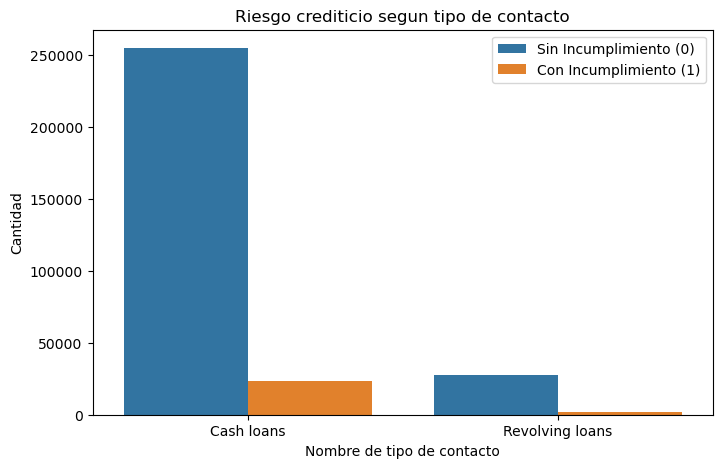

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=application_train, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title("Riesgo crediticio segun tipo de contacto")
plt.xlabel("Nombre de tipo de contacto")
plt.ylabel("Cantidad")
plt.legend(['Sin Incumplimiento (0)', 'Con Incumplimiento (1)'])
plt.show()

In [7]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Feature engineering

In [8]:
categorical_cols = application_train.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
# Crear un diccionario para guardar los LabelEncoders
label_encoders = {}

# Aplicar Label Encoder a cada columna categórica
for col in categorical_cols:
    le = LabelEncoder()
    application_train[col + '_encoded'] = le.fit_transform(application_train[col])
    label_encoders[col] = le  # Guardar el encoder para uso futuro


In [10]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,WEEKDAY_APPR_PROCESS_START_encoded,ORGANIZATION_TYPE_encoded,FONDKAPREMONT_MODE_encoded,HOUSETYPE_MODE_encoded,WALLSMATERIAL_MODE_encoded,EMERGENCYSTATE_MODE_encoded
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,6,5,2,0,5,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,

In [11]:
train_copy = application_train.copy()
train_copy.drop(categorical_cols, axis=1, inplace=True)

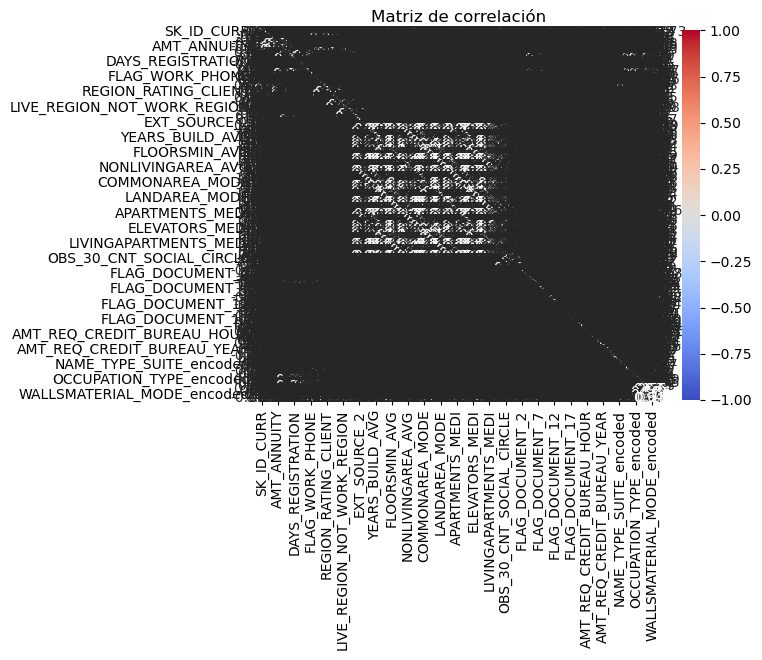

In [12]:
# Calculamos la matriz de correlación para el train
correlation_matrix = train_copy.corr()

# Creamos un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

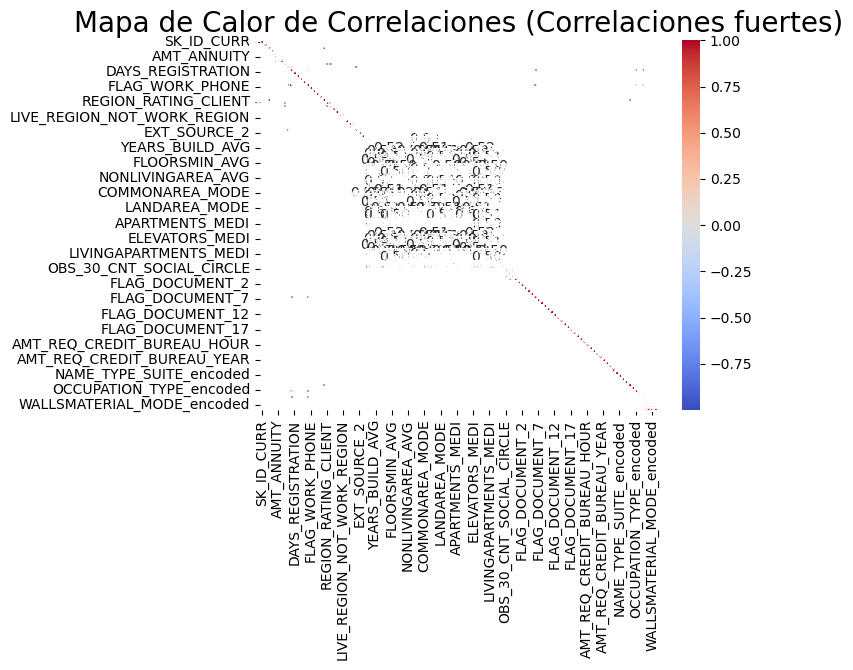

In [13]:
# Tapamos valores bajos (absolutos < 0.5)
mask = correlation_matrix.abs() < 0.5
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Mapa de Calor de Correlaciones (Correlaciones fuertes)', fontsize=20)
plt.show()


In [14]:
train_copy.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'NAME_EDUCATION_TYPE_encoded', 'NAME_FAMILY_STATUS_encoded',
       'NAME_HOUSING_TYPE_encoded', 'OCCUPATION_TYPE_encoded',
       'WEEKDAY_APPR_PROCESS_START_encoded', 'ORGANIZATION_TYPE_encoded',
       'FONDKAPREMONT_MODE_encoded', 'HOUSETYPE_MODE_encoded',
       'WALLSMATERIAL_MODE_encoded', 'EMERGENCYSTATE_MODE_encoded'],
      dtype='object', length=122)

In [15]:
extra_columns = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE'
]

In [16]:
k=0
j=0
for col in list(extra_columns):
  if col in train_copy.columns:
    train_copy.drop(col, axis=1, inplace=True)
    k += 1
  elif col+'_encoded' in train_copy.columns:
    train_copy.drop(col+'_encoded', axis=1, inplace=True)
    j+= 1
print(k,j)

36 5


In [17]:
train_copy.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMEN

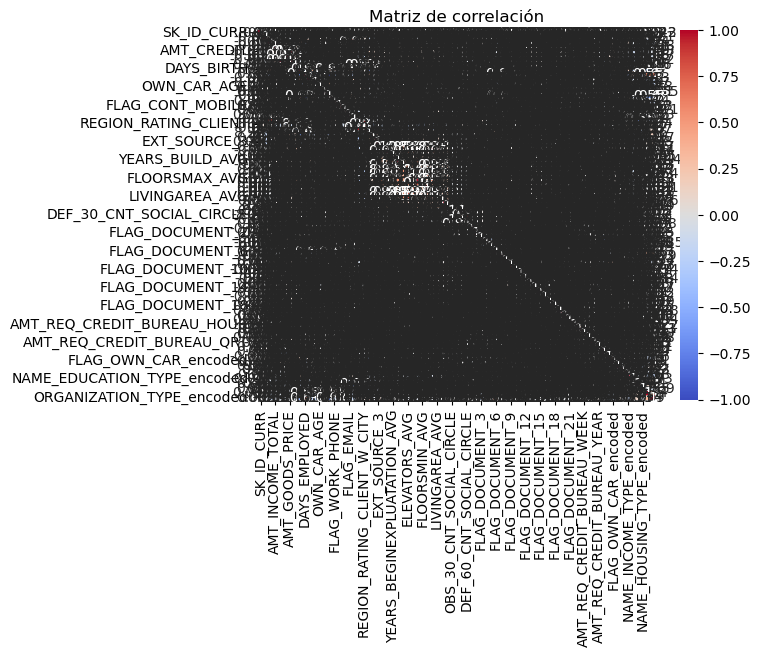

In [18]:
# Calcular la matriz de correlación con el daaframe "podado"
corr_matrix = train_copy.corr()

# Crear un heatmap de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

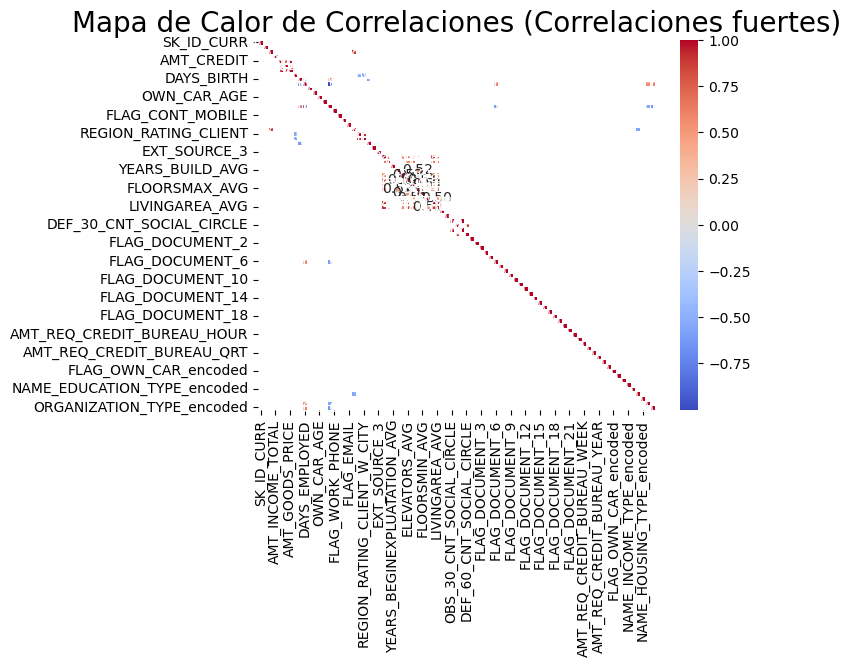

In [19]:
#Tapamos valores bajos (absolutos < 0.5)
mask = corr_matrix.abs() < 0.5
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Mapa de Calor de Correlaciones (Correlaciones fuertes)', fontsize=20)
plt.show()

In [20]:
#VOY A TRABAJAR DESDE ACÁ. LAS SIGUIENTES CELDAS SON ANÁLISIS DE RELACIONNES DE LAS FEATURES QUE NO ME LLEVARON A NADA ESPECIAL.
#LA IDEA ES APLICAR FEATURE ENGINEERING PARA REDUCIR LAS DIMENSIONES DEL DATASET Y PARA FILTRAR LAS COLUMNAS IRRELEVANTES:
#PASOS A SEGUIR:
#1) USAR DATAFRAME train_copy(new)=tc_2 (YA TIENE LAS CATEGORICAL ENCODED Y DROPEADAS LAS ORIGINALES)
#2) REDUCIR LAS FLAG_DOCUMENT_X A UNA SOLA COLUMNA QUE SEA UN RECUENTO DE DOCUMENTOS PRESENTADOS.
#3) PASAR TODO LO QUE SEAN EDADES, AÑOS DE TRABAJO, ETC, A AÑOS.
#4) BORRAR LAS FEATURES DE TENDENCIA CENTRAL.
#5) VERIFICAR QUE NO QUEDE NINGUNA COLUMNA "BASURA".
#6) DESCARGAR EL .CSV Y PASARLO/SUBIRLO AL PROYECTO.

#2)
tc_2 =train_copy.copy()
documents_columns = [col for col in tc_2.columns if col.startswith('FLAG_DOCUMENT')]
tc_2['DOCUMENT_COUNT']= tc_2[documents_columns].sum(axis=1)
tc_2.drop(documents_columns, axis=1, inplace=True)
tc_2.head()
#tc_2.DOCUMENT_COUNT.value_counts()
#3)
tc_2.DAYS_BIRTH = tc_2.DAYS_BIRTH.apply(lambda x: int(abs(x)/365))
tc_2.DAYS_EMPLOYED = tc_2.DAYS_EMPLOYED.apply(lambda x: int(abs(x)/365))
tc_2.rename(columns={'DAYS_BIRTH': 'YEARS_OLD'}, inplace=True)
tc_2.rename(columns={'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, inplace=True)
tc_2.head()
#4)DONE
#5)DONE
#6)
#tc_2.to_csv('tc_2.csv', index=False)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1


In [21]:
tc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   YEARS_OLD                    307511 non-null  int64  
 9   YEARS_EMPLOYED               307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  OWN_CAR_AGE                  104582 non-null  float64
 13 

In [22]:
#RESTAURAR LOS VALORES DE LAS COLUMNAS ENCODED ORIGINALES.

ENCODED_COLUMNS = [col for col in tc_2.columns if col.endswith('_encoded')]

for encoded_col in ENCODED_COLUMNS:
    original_col = encoded_col.replace('_encoded', '')

    if original_col in label_encoders:
        tc_2[original_col] = label_encoders[original_col].inverse_transform(tc_2[encoded_col])


In [23]:
tc_2.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_OLD', 'YEARS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
  

In [24]:
#CAMBIO DE NAN'S A 99 (PARA PODER PROCESAR LOS DATOS, RECORDAR QUE ESTE 99 == NAN)
tc_2[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].fillna(99, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10760\2560994213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc_2[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].fillna(99, inplace=True)


In [25]:
df_application_train = tc_2.copy()
df_application_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,NaN,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,6,7,4,2,5,14,43,1,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With par

In [26]:
df_application_train.groupby(['TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()

,TARGET,SK_ID_CURR
0,0,282686
1,1,24825


## Tabla bureau

In [27]:
bureau_df = bureau.copy()

In [28]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [29]:
bureau_df.shape

(1716428, 17)

In [30]:
bureau_df.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [31]:
#muestra nombre de columna, si el tipo de dato es OBJECT muestra todos los valores posibles, si el tipo de dato es numérico muestra los dos valores más pequeños y los dos valores más altos
for col in bureau_df.columns:
  if bureau_df[col].dtype == 'object':
    print(col, (bureau_df[col].unique()))
  else:
     print(col, bureau_df[col].nsmallest(2).tolist() + [' . . .  '] + bureau_df[col].nlargest(2).tolist())

SK_ID_CURR [100001, 100001, ' . . .  ', 456255, 456255]
SK_ID_BUREAU [5000000, 5000001, ' . . .  ', 6843457, 6843456]
CREDIT_ACTIVE ['Closed' 'Active' 'Sold' 'Bad debt']
CREDIT_CURRENCY ['currency 1' 'currency 2' 'currency 4' 'currency 3']
DAYS_CREDIT [-2922, -2922, ' . . .  ', 0, 0]
CREDIT_DAY_OVERDUE [0, 0, ' . . .  ', 2792, 2781]
DAYS_CREDIT_ENDDATE [-42060.0, -42056.0, ' . . .  ', 31199.0, 31198.0]
DAYS_ENDDATE_FACT [-42023.0, -3042.0, ' . . .  ', 0.0, 0.0]
AMT_CREDIT_MAX_OVERDUE [0.0, 0.0, ' . . .  ', 115987185.0, 94812246.0]
CNT_CREDIT_PROLONG [0, 0, ' . . .  ', 9, 9]
AMT_CREDIT_SUM [0.0, 0.0, ' . . .  ', 585000000.0, 396000000.0]
AMT_CREDIT_SUM_DEBT [-4705600.32, -3109510.98, ' . . .  ', 170100000.0, 164032200.0]
AMT_CREDIT_SUM_LIMIT [-586406.115, -401346.945, ' . . .  ', 4705600.32, 4500000.0]
AMT_CREDIT_SUM_OVERDUE [0.0, 0.0, ' . . .  ', 3756681.0, 3681063.0]
CREDIT_TYPE ['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment

In [32]:
#muestra nombre de columna, cantidad de valores únicos que toma, y relación de nulos respecto al total de registros
for col in bureau_df.columns:
    print( col, len( (bureau_df[col].unique()) ) , bureau_df[col].isnull().sum()/len(bureau_df) )

SK_ID_CURR 305811 0.0
SK_ID_BUREAU 1716428 0.0
CREDIT_ACTIVE 4 0.0
CREDIT_CURRENCY 4 0.0
DAYS_CREDIT 2923 0.0
CREDIT_DAY_OVERDUE 942 0.0
DAYS_CREDIT_ENDDATE 14097 0.06149573416420613
DAYS_ENDDATE_FACT 2918 0.36916957775100384
AMT_CREDIT_MAX_OVERDUE 68252 0.6551326359159837
CNT_CREDIT_PROLONG 10 0.0
AMT_CREDIT_SUM 236709 7.573868522303295e-06
AMT_CREDIT_SUM_DEBT 226538 0.15011931755948982
AMT_CREDIT_SUM_LIMIT 51727 0.3447741472406649
AMT_CREDIT_SUM_OVERDUE 1616 0.0
CREDIT_TYPE 15 0.0
DAYS_CREDIT_UPDATE 2982 0.0
AMT_ANNUITY 40322 0.714734902949614


Hay columnas con gran porcentaje de valores nulos, como  AMT_ANNUITY con 71% y AMT_CREDIT_MAX_OVERDUE con 65.5%

In [33]:
#probando, aquí se muestra lo mismo que las dos celdas anteriores pero todo junto
for col in bureau_df.columns:
  if bureau_df[col].dtype == 'object':
    print(col, (bureau_df[col].unique()))
  else:
     print(col, len( (bureau_df[col].unique()) ), bureau_df[col].nsmallest(2).tolist() + [' . . .  '] + bureau_df[col].nlargest(2).tolist(),  bureau_df[col].isnull().sum()/len(bureau_df))

SK_ID_CURR 305811 [100001, 100001, ' . . .  ', 456255, 456255] 0.0
SK_ID_BUREAU 1716428 [5000000, 5000001, ' . . .  ', 6843457, 6843456] 0.0
CREDIT_ACTIVE ['Closed' 'Active' 'Sold' 'Bad debt']
CREDIT_CURRENCY ['currency 1' 'currency 2' 'currency 4' 'currency 3']
DAYS_CREDIT 2923 [-2922, -2922, ' . . .  ', 0, 0] 0.0
CREDIT_DAY_OVERDUE 942 [0, 0, ' . . .  ', 2792, 2781] 0.0
DAYS_CREDIT_ENDDATE 14097 [-42060.0, -42056.0, ' . . .  ', 31199.0, 31198.0] 0.06149573416420613
DAYS_ENDDATE_FACT 2918 [-42023.0, -3042.0, ' . . .  ', 0.0, 0.0] 0.36916957775100384
AMT_CREDIT_MAX_OVERDUE 68252 [0.0, 0.0, ' . . .  ', 115987185.0, 94812246.0] 0.6551326359159837
CNT_CREDIT_PROLONG 10 [0, 0, ' . . .  ', 9, 9] 0.0
AMT_CREDIT_SUM 236709 [0.0, 0.0, ' . . .  ', 585000000.0, 396000000.0] 7.573868522303295e-06
AMT_CREDIT_SUM_DEBT 226538 [-4705600.32, -3109510.98, ' . . .  ', 170100000.0, 164032200.0] 0.15011931755948982
AMT_CREDIT_SUM_LIMIT 51727 [-586406.115, -401346.945, ' . . .  ', 4705600.32, 4500000.0] 0.

In [34]:
#separamos del df HOME CREDIT COLUMNS DESCRIPTION las columnas pertenecientes al archivo en análisis: bureau.csv
HomeCredit_columns_description_df[HomeCredit_columns_description_df['Table']=='bureau.csv']

,Unnamed: 0,Table,Row,Description,Special
122,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,129,bureau.csv,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN
131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,NaN


In [35]:
#crea un df con las filas deseadas, ordenándolas según su valor en la columna int64_field_0, para que coincidan con el orden que tienen en bureau.csv
bureau_description=HomeCredit_columns_description_df[HomeCredit_columns_description_df['Table']=='bureau.csv'].sort_values(by=['Unnamed: 0'])

In [36]:
#elimina las columnas irrelevantes
bureau_description.drop(['Unnamed: 0','Table','Special'], axis=1, inplace=True)

In [37]:
#el índice no corresponde con la tabla, fue generado automáticamente al importar los datos, ignorar-
bureau_description

,Row,Description
122,SK_ID_CURR,ID of loan in our sample - one loan in our sam...
123,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...
124,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits
125,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit
126,DAYS_CREDIT,How many days before current application did c...
127,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...
128,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...
129,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...
130,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...
131,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...


(AMT= ammount, cantidad)

CREDICT_ACTIVE: estado del crétido previo ['Active' 'Sold' 'Closed' 'Bad debt']

CREDIT_CURRENCY: moneda en que está el crétido ['currency 1' 'currency 3' 'currency 2' 'currency 4']

DAYS_CREDIT Numero de días de distancia entre la aplicación del crédito previo y el actual, números negativos significas -100:El préstamo anterior se solicitó 100 días antes de la solicitud al préstamos actual[-2922, -2922, ' . . .  ', 0, 0]

CREDIT_DAY_OVERDUE: The number of days the client was past due on the Credit Bureau credit at the time they applied for the loan. This indicates any delinquency on previous credits. [0, 0, ' . . .  ', 2792, 2781]

DAYS_CREDIT_ENDDATE: Para créditos activos- representa los días que quedan del préstamo previo al momento de hacer la solicitud nueva. Para crédtios cerrados, representa los días que pasaron desde el cierre del crédito previo hasta el día de la solicitud nueva [-42060.0, -42056.0, ' . . .  ', 31199.0, 31198.0] 0.06149573416420613 (6% nulos)

DAYS_ENDDATE_FACT : Lo anterior, pero solo para los créditos cerrados [-42023.0, -3042.0, ' . . .  ', 0.0, 0.0] 0.36916957775100384 (37% nulos)

AMT_CREDIT_MAX_OVERDUE: La mayor deuda registrada en el Bureau en cualquier momento previo a la solicitud [0.0, 0.0, ' . . .  ', 115987185.0, 94812246.0] 0.6551326359159837 (65% nulos)

CNT_CREDIT_PROLONG : Cantidad de veces que el crédito fue extendido [0, 0, ' . . .  ', 9, 9] 0.0

AMT_CREDIT_SUM : Monto aprobado para el crédito previo  [0.0, 0.0, ' . . .  ', 585000000.0, 396000000.0]

AMT_CREDIT_SUM_DEBT : Cuál es la deuda actual [-4705600.32, -3109510.98, ' . . .  ', 170100000.0, 164032200.0] 0.15011931755948982 (15% nulos)

AMT_CREDIT_SUM_LIMIT : Límite de crédito actual por el crédito previo [-586406.115, -401346.945, ' . . .  ', 4705600.32, 4500000.0] 0.3447741472406649 (34% nulos)

AMT_CREDIT_SUM_OVERDUE : Cantidad de deuda atrasada del préstamo anterior [0.0, 0.0, ' . . .  ', 3756681.0, 3681063.0] 0.0

CREDIT_TYPE : Tipo de crédito ['Consumer credit' 'Credit card' 'Loan for working capital replenishment'
 'Car loan' 'Microloan' 'Real estate loan' 'Mortgage'
 'Loan for business development' 'Another type of loan'
 'Loan for the purchase of equipment'
 'Loan for purchase of shares (margin lending)' 'Interbank credit'
 'Unknown type of loan' 'Cash loan (non-earmarked)' 'Mobile operator loan']

DAYS_CREDIT_UPDATE : días desde la última actualización de datos del crédito anterior en el Bureau [-41947, -41946, ' . . .  ', 372, 23]

AMT_ANNUITY : monto de las cuotas del crédito [0.0, 0.0, ' . . .  ', 118453423.5, 90632371.5] 0.714734902949614 (71% nulos)

In [38]:
bureau_df.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Cosas que pueden resultar interesantes:


*  COMPLETADO O NO
*  TIPO DE CREDITO
*    DEUDA O NO
*    CANTIDAD DE CUOTAS
*   TIEMPO DE SOLICITADO
*   DESPUES DE CUANTAS CUOTAS SE COMPLETO

Como hay varios préstamos previos para un mismo SK_ID_CURRENT, se evaluarán máximos, mínimos, medias y categorías (binaria [SI/NO] y múltiples)

BUREAU

In [39]:
#BUREAU CONTIENE DATOS ACTUALIZADOS AL DIA DE LA FECHA DE LA NUEVA SOLICITUD DE CRÉDITO, CONTIENE DATOS DE CREDITOS HISTORICOS
#es decir, todos los datos corresponderían a MONTH_BALANCE = -1

bureau_mrg = bureau_df.groupby('SK_ID_CURR', as_index=False).agg(
    AMT_LARGEST_RECORDED_DEBT=('AMT_CREDIT_MAX_OVERDUE','max'),
#qué significan los Nan en AMT_CREDIT_MAX_OVERDUE????
#mayor deuda que haya tenido HISTORICAMENTE con algún crédito

    DAYS_SINCE_LAST_APPLICATION=('DAYS_CREDIT','min'),
#dias que pasaron desde la última vez que solicitó un crédito

    AMT_CREDIT_MAX=('AMT_CREDIT_SUM','max'),
#monto del mayor crédito otorgado

    AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT','max'),
#monto de deuda impaga ACTUALMENTE


    CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG','max'),
#maxima cantidad de veces que prolongó algún crédito

    ACTIVE = ('CREDIT_ACTIVE', lambda x: (x == 'Active').sum()),

    BAD_DEBT = ('CREDIT_ACTIVE', lambda x: (x == 'Bad debt').sum()),

    COMPLETED = ('CREDIT_ACTIVE', lambda x: (x == 'Completed').sum()),


)

In [40]:
bureau_mrg

,SK_ID_CURR,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100001,NaN,-1572,378000.00,373239.00,0,3,0,0
1,100002,5043.645,-1437,450000.00,245781.00,0,2,0,0
2,100003,0.000,-2586,810000.00,0.00,0,1,0,0
3,100004,0.000,-1326,94537.80,0.00,0,0,0,0
4,100005,0.000,-373,568800.00,543087.00,0,2,0,0
...,...,...,...,...,...,...,...,...,...
305806,456249,18945.000,-2713,765000.00,163071.00,0,2,0,0
305807,456250,0.000,-1002,2153110.05,1840308.48,0,2,0,0
305808,456253,NaN,-919,2250000.00,1624797.00,0,2,0,0
305809,456254,NaN,-1104,45000.00,0.00,0,0,0,0


## Tabla bureau balance

In [41]:
print(bureau.columns)
print(bureau_balance.columns)

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')
Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [42]:
bureau_balance.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

In [43]:
bureau.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

In [44]:
bureau.shape, bureau_balance.shape

((1716428, 17), (27299925, 3))

In [45]:
bureau.head(1)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN


In [46]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


### Feature engineering bureau_balance

In [47]:
df_bureau = bureau[['SK_ID_CURR', 'SK_ID_BUREAU']].merge(bureau_balance, on='SK_ID_BUREAU', how='inner').drop(columns=['SK_ID_BUREAU'])

In [48]:
df_bureau.head()

,SK_ID_CURR,MONTHS_BALANCE,STATUS
0,380361,0,C
1,380361,-1,C
2,380361,-2,C
3,380361,-3,C
4,380361,-4,C


In [49]:
df_bureau['MONTHS_BALANCE'].value_counts()

MONTHS_BALANCE
-1     599342
-2     595803
-3     591398
 0     588522
-4     585261
        ...  
-92     15485
-93     11403
-94      7506
-95      3786
-96       106
Name: count, Length: 97, dtype: int64

In [50]:
df_bureau['STATUS'].value_counts()

STATUS
C    11555429
0     7195282
X     5115090
1      229773
5       50334
2       20954
3        7833
4        5046
Name: count, dtype: int64

In [51]:
df_bureau

,SK_ID_CURR,MONTHS_BALANCE,STATUS
0,380361,0,C
1,380361,-1,C
2,380361,-2,C
3,380361,-3,C
4,380361,-4,C
...,...,...,...
24179736,407724,-75,X
24179737,407724,-76,X
24179738,407724,-77,X
24179739,407724,-78,X


### Creación de Target

In [52]:
df_bureau['DEF_60'] = np.where( 
                                    (df_bureau['STATUS']).isin(['2', '3', '4', '5']) &
                                    (df_bureau['MONTHS_BALANCE'] >-24), 1, 0)

Solo los clientes de los ultimos 2 años y las personas que tengan mas de 60 dias de atraso 

In [53]:
df_bureau.groupby(['DEF_60']).agg({'SK_ID_CURR':'count'}).reset_index()

,DEF_60,SK_ID_CURR
0,0,24152466
1,1,27275


In [54]:
df_target = df_bureau.groupby(['SK_ID_CURR']).agg({'MONTHS_BALANCE':'count', 'DEF_60':'max'}).reset_index()

Agrupo mediente su ID, y cuento los meses que esta persona ademas de poner su maxi de def_60 que significa que si esa persona en los ultimos 2 años es un mal pagador (1) sino es asi (0)

In [55]:
df_target

,SK_ID_CURR,MONTHS_BALANCE,DEF_60
0,100001,172,0
1,100002,110,0
2,100005,21,0
3,100010,72,0
4,100013,230,0
...,...,...,...
134537,456247,320,0
134538,456250,87,0
134539,456253,117,0
134540,456254,37,0


In [56]:
df_target.groupby(['DEF_60']).agg({'SK_ID_CURR':'count'}).reset_index()

,DEF_60,SK_ID_CURR
0,0,131034
1,1,3508


## Tabla POS CASH balance

In [57]:
#Selecciona las filas del archivo .csv que se analizará en el apartado siguiente
HomeCredit_columns_description_df[HomeCredit_columns_description_df['Table']=='POS_CASH_balance.csv']

,Unnamed: 0,Table,Row,Description,Special
142,145,POS_CASH_balance.csv,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
144,147,POS_CASH_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
145,148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
146,149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
147,150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
148,151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previo...,NaN
149,152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,NaN


In [58]:
POS_CASH_balance_description = HomeCredit_columns_description_df[HomeCredit_columns_description_df['Table']=='POS_CASH_balance.csv']
POS_CASH_balance_description.drop(['Unnamed: 0','Table','Special'], axis=1, inplace=True)
POS_CASH_balance_description

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10760\82435579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POS_CASH_balance_description.drop(['Unnamed: 0','Table','Special'], axis=1, inplace=True)


,Row,Description
142,SK_ID_PREV,ID of previous credit in Home Credit related t...
143,SK_ID_CURR,ID of loan in our sample
144,MONTHS_BALANCE,Month of balance relative to application date ...
145,CNT_INSTALMENT,Term of previous credit (can change over time)
146,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit
147,NAME_CONTRACT_STATUS,Contract status during the month
148,SK_DPD,DPD (days past due) during the month of previo...
149,SK_DPD_DEF,DPD during the month with tolerance (debts wit...


In [59]:
POS_CASH_balance_df = POS_CASH_balance.copy()

In [60]:
POS_CASH_balance_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [61]:
#nombres de las columnas
POS_CASH_balance_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [62]:
#tipos de dato que contiene cada columna
POS_CASH_balance_df.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [63]:
#muestra algunos de los valores que contiene cada columna
for col in POS_CASH_balance_df.columns:
    print((POS_CASH_balance_df[col].unique()))

[1803195 1715348 1784872 ... 2452932 1980876 2308284]
[182943 367990 397406 ... 394310 240059 144536]
[-31 -33 -32 -35 -38 -39 -34 -41 -37 -40 -43 -36 -42 -47 -44 -46 -45 -27
 -25 -24 -30 -28 -26 -29 -48 -15 -19 -22 -14 -18 -16 -21 -17 -20 -23  -1
  -6  -2  -3  -5  -4 -13 -11 -10  -9  -7  -8 -54 -49 -52 -53 -50 -51 -55
 -12 -94 -95 -92 -91 -96 -93 -57 -64 -56 -59 -60 -66 -65 -58 -63 -62 -61
 -87 -86 -88 -89 -90 -72 -74 -73 -82 -78 -81 -75 -77 -80 -76 -79 -69 -70
 -71 -68 -67 -83 -85 -84]
[48. 36. 12. 24. 60. 18.  4. 42. 25. 14. 16. 13.  8. 10. 15. 11. 30. 54.
  6.  9.  5. 17.  3.  2. 20. 32. nan  1.  7. 47. 49. 28. 43. 23. 21. 19.
 39. 37. 35. 27. 22. 41. 31. 61. 26. 34. 29. 44. 55. 33. 66. 46. 59. 38.
 72. 40. 57. 45. 92. 56. 84. 51. 52. 58. 62. 53. 64. 50. 77. 70. 81. 63.
 71. 68.]
[45. 35.  9. 42. 12. 43. 36. 16. 24.  5. 15.  1. 28. 23. 56. 11.  7. 18.
 17. 46. 21.  0.  4. 40. 32. 19.  8. 10.  2. 13. 14.  3.  6. 48. 22. 34.
 47. 30. 29. 41. 54. 20. 37. 31. 27. 26. nan 25. 38. 33. 39

In [64]:
#muestra el nombre de columna, la cantidad de valores únicos que toma, y la razón de valores nulos que contiene
for col in POS_CASH_balance_df.columns:
    print( col, len( (POS_CASH_balance_df[col].unique()) ) , POS_CASH_balance_df[col].isnull().sum()/len(POS_CASH_balance_df) )


SK_ID_PREV 936325 0.0
SK_ID_CURR 337252 0.0
MONTHS_BALANCE 96 0.0
CNT_INSTALMENT 74 0.0026067460038926714
CNT_INSTALMENT_FUTURE 80 0.002608345786642174
NAME_CONTRACT_STATUS 9 0.0
SK_DPD 3400 0.0
SK_DPD_DEF 2307 0.0


**Analizando** el dataset POS_CASH_balance no se ve la necesidad de descartar el uso de alguna columna por falta de datos, ya que el porcentaje es muy bajo

Se nota que de 10 000 000 de registros (filas) que contiene el df, solo hay aprox. 100 000 valores únicos, quiere decir que se repiten los mismos valores de ID para varias columnas.

In [65]:
#ordenando el df según los valores DK_ID_PREV y MONTHS_BALANCE se ve la razón de la diferencia de cantidad de registros y valores únicos de ID
POS_CASH_balance_df_sorted=POS_CASH_balance_df.sort_values(by=['SK_ID_PREV','MONTHS_BALANCE'], ascending=[True, False])
POS_CASH_balance_df_sorted.head(25)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
8470736,1000001,158271,-9,12.0,11.0,Active,0,0
6030662,1000001,158271,-10,12.0,12.0,Active,0,0
2792302,1000002,101962,-50,4.0,0.0,Completed,0,0
2658581,1000002,101962,-51,6.0,1.0,Active,0,0
2549591,1000002,101962,-52,6.0,2.0,Active,0,0
3346102,1000002,101962,-53,6.0,3.0,Active,0,0
4467804,1000002,101962,-54,4.0,4.0,Active,0,0
7085917,1000003,252457,-1,12.0,9.0,Active,0,0
9852178,1000003,252457,-2,12.0,10.0,Active,0,0


In [66]:
#se analiza el significado del nombre de cada columna
POS_CASH_balance_description

,Row,Description
142,SK_ID_PREV,ID of previous credit in Home Credit related t...
143,SK_ID_CURR,ID of loan in our sample
144,MONTHS_BALANCE,Month of balance relative to application date ...
145,CNT_INSTALMENT,Term of previous credit (can change over time)
146,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit
147,NAME_CONTRACT_STATUS,Contract status during the month
148,SK_DPD,DPD (days past due) during the month of previo...
149,SK_DPD_DEF,DPD during the month with tolerance (debts wit...


### Interpretación de columnas
"CNT" is used as an abbreviation for "count" to indicate the number or quantity of something.

"SK" likely stands for surrogate key or system key. In simpler terms, it can be understood as a unique identifier that is automatically generated and assigned to each record in a dataset or table.

DPD: Stands for Days Past Due. It indicates the number of days a borrower is late in making a payment on a loan.

DPD_DEF-- Tolerance: In this context, tolerance refers to a certain level of leniency applied when calculating DPD

CNT_INSTALMENT: This refers to the total number of installments (payments) scheduled for a previous loan.

CNT_INSTALMENT_FUTURE: The number of installments (monthly payments) remaining on the previous loan. This shows how many payments are still to be made.

NAME_CONTRACT_STATUS: The status of the previous loan contract during a specific month

SK_DPD: The number of days the borrower was past due (late) on their payment for the previous loan during a specific month. This is an important indicator of the borrower's repayment behavior.

SK_DPD_DEF: Similar to SK_DPD, but this field considers a "tolerance" period. Smaller loan amounts or minor delays might be ignored, resulting in a lower or zero value compared to SK_DPD. It provides a more lenient view of late payments.

MONTHS_BALANCE:


In [67]:
#tratando de entender MONTHS_BALANCE
for col in POS_CASH_balance_df.columns:
  if POS_CASH_balance_df[col].dtype == 'object':
    print(col, (POS_CASH_balance_df[col].unique()))
  else:
     print(col, len( (POS_CASH_balance_df[col].unique()) ), POS_CASH_balance_df[col].nsmallest(2).tolist() + [' . . .  '] + POS_CASH_balance_df[col].nlargest(2).tolist(),  POS_CASH_balance_df[col].isnull().sum()/len(POS_CASH_balance_df))

SK_ID_PREV 936325 [1000001, 1000001, ' . . .  ', 2843499, 2843499] 0.0
SK_ID_CURR 337252 [100001, 100001, ' . . .  ', 456255, 456255] 0.0
MONTHS_BALANCE 96 [-96, -96, ' . . .  ', -1, -1] 0.0
CNT_INSTALMENT 74 [1.0, 1.0, ' . . .  ', 92.0, 84.0] 0.0026067460038926714
CNT_INSTALMENT_FUTURE 80 [0.0, 0.0, ' . . .  ', 85.0, 84.0] 0.002608345786642174
NAME_CONTRACT_STATUS ['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store' 'Demand'
 'Canceled' 'XNA' 'Amortized debt']
SK_DPD 3400 [0, 0, ' . . .  ', 4231, 4200] 0.0
SK_DPD_DEF 2307 [0, 0, ' . . .  ', 3595, 3565] 0.0


- *MOTHS_BALANCE toma valores negativos, nunca cero. Comienza con valores altos y toma su menor valor cuando el estatus del crédito cambia de Activo a Completado*
- *Se comparará con CNT_INSTALMENT_FUTURE que cuenta la cantidad de pagos que restan para saldar el crédito*

Analizando los posibles estatus de contratos de créditos previos

Active: The loan is currently in progress, and the borrower is making regular payments according to the agreed-upon terms.

Completed: The borrower has fully repaid the loan, including all principal and interest, and the loan is now closed.

Signed: The loan contract has been signed by both the borrower and the lender, but the loan has not yet been fully disbursed or activated. It's in the initial stage.

Returned to the store: This status typically applies to loans used for purchasing goods. It indicates that the borrower returned the purchased item to the store, leading to the cancellation or termination of the loan.

Demand: The lender has demanded full repayment of the loan before the original due date, usually due to a breach of contract or other specific circumstances.

Approved: The loan application has been reviewed and approved by the lender, but the loan has not yet been disbursed or activated. It's one step before 'Signed' or 'Active'.

Amortized debt: The loan is being repaid through regular installments, with each payment covering both principal and interest. This is a common repayment method for most loans.

XNA: This indicates that the loan status is not available or unknown. It might be used as a placeholder for missing or unclear information.

Canceled: The loan contract has been canceled before it was fully disbursed or activated. This could be due to various reasons, such as the borrower withdrawing their application or the lender rejecting it after initial approval.

<BarContainer object of 9 artists>

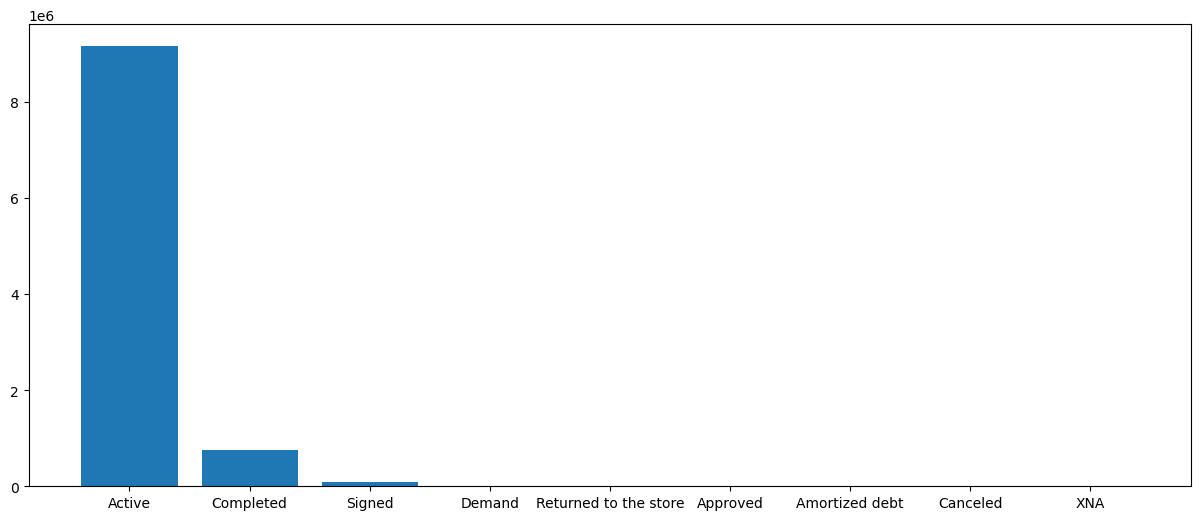

In [68]:
plt.figure(figsize=(15, 6))
plt.bar(POS_CASH_balance_df['NAME_CONTRACT_STATUS'].value_counts().index,POS_CASH_balance_df['NAME_CONTRACT_STATUS'].value_counts().values
        )

In [69]:
#Un df que solo contiene las filas cuyo estatus no es ACTIVE
POS_CASH_balance_notactive_df=POS_CASH_balance_df[POS_CASH_balance_df['NAME_CONTRACT_STATUS'] != 'Active']

In [70]:
POS_CASH_balance_notactive_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
42,1298869,210084,-41,48.0,0.0,Completed,0,0
51,2165412,239703,-35,12.0,12.0,Signed,0,0
52,1955907,134432,-34,4.0,0.0,Completed,0,0
56,1367593,336653,-31,18.0,18.0,Signed,0,0
124,2714240,302709,-38,16.0,0.0,Completed,0,0


In [71]:
#Hay algún COMPLETADO que aún tenga cuotas a pagar?
POS_CASH_balance_notactive_df[POS_CASH_balance_notactive_df['NAME_CONTRACT_STATUS'] == 'Completed'][POS_CASH_balance_notactive_df['CNT_INSTALMENT_FUTURE'] != 0].head(50)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10760\3172540882.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  POS_CASH_balance_notactive_df[POS_CASH_balance_notactive_df['NAME_CONTRACT_STATUS'] == 'Completed'][POS_CASH_balance_notactive_df['CNT_INSTALMENT_FUTURE'] != 0].head(50)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
5698991,1332308,284039,-26,12.0,7.0,Completed,10,10
7901876,1769939,264254,-16,8.0,8.0,Completed,0,0
7901877,2408885,142212,-8,8.0,8.0,Completed,0,0
8024814,1134377,397682,-95,10.0,10.0,Completed,0,0


*Hay solo 4 filas donde un estatus COMPLETED aún tiene pagos futuros / una sola presenta días de atraso, probablemente sean errores - Podemos asumir que el ESTATUS=COMPLETED indica que el préstamo previo fue saldado*

In [72]:
len(POS_CASH_balance_notactive_df[POS_CASH_balance_notactive_df['NAME_CONTRACT_STATUS'] == 'Completed'])

744883

In [73]:
# Y  en las filas con mayor cantidad de cuotas por pagar, coincide con las cuotas restantes , es decir, aún no ah comenzado a pagarse y su estado será firmado-cancelado-devuelto etc...
POS_CASH_balance_notactive_df[POS_CASH_balance_notactive_df['CNT_INSTALMENT_FUTURE']!=POS_CASH_balance_notactive_df['CNT_INSTALMENT_FUTURE']].dropna()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF


In [74]:
POS_CASH_balance_notactive_df.sort_values('CNT_INSTALMENT_FUTURE', ascending=False).head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9610830,2640160,211266,-74,61.0,61.0,Signed,0,0
4172069,1172717,330691,-27,60.0,60.0,Signed,0,0
1584353,1740054,148545,-32,60.0,60.0,Signed,0,0
4179720,1783659,248420,-8,60.0,60.0,Signed,0,0
4182529,2585019,339070,-23,60.0,60.0,Approved,0,0


In [75]:
#Ordenadas por número AK_ID_CURR, muestra las filas que no contienen 'Active' o 'Completed'
POS_CASH_balance_notactive_df[POS_CASH_balance_notactive_df['NAME_CONTRACT_STATUS']!='Completed'].sort_values('SK_ID_CURR', ascending=True).head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2930769,2495675,100005,-25,NaN,NaN,Signed,0,0
2692043,2299329,100006,-20,NaN,NaN,Returned to the store,0,0
5536722,1940724,100007,-36,12.0,12.0,Signed,0,0
6336317,1186888,100008,-84,6.0,6.0,Signed,0,0
208022,1865796,100013,-66,9.0,9.0,Signed,0,0


In [76]:
POS_CASH_balance_notactive_df[POS_CASH_balance_notactive_df['NAME_CONTRACT_STATUS']!='Completed'].sort_values('SK_ID_CURR', ascending=True).shape

(105356, 8)

### Procesamiento

In [77]:
#Qué pasa con los créditos previos
POS_CASH_balance_df[POS_CASH_balance_df['NAME_CONTRACT_STATUS']=='Completed'].sort_values(by=['SK_ID_CURR'])
#Hay prestamos con varios o con ningún préstamo previos COMPLETADOS

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4928574,1851984,100001,-93,4.0,0.0,Completed,0,0
5467865,1810518,100003,-18,7.0,0.0,Completed,0,0
6030254,2636178,100003,-21,6.0,0.0,Completed,0,0
2446580,1564014,100004,-24,3.0,0.0,Completed,0,0
...,...,...,...,...,...,...,...,...
3069694,2631384,456255,-2,24.0,0.0,Completed,0,0
8695284,1743609,456255,-23,10.0,0.0,Completed,0,0
6439473,1359084,456255,-7,8.0,0.0,Completed,0,0
4749966,1179690,456255,-7,16.0,0.0,Completed,0,0


In [78]:
POS_CASH_balance_df[POS_CASH_balance_df['NAME_CONTRACT_STATUS']=='Active'].sort_values(by=['MONTHS_BALANCE'], ascending=False)
#Respecto a los présatmos activos: podemos ver los que tenían préstamos activos en el mes anterior a solicitar el nuevo crédito/ cuáles incurrieron en deudas/ y cuántas cuotas restan pagar (evitando caer en que para un mismo préstamo activo hay balances de muchos meses, si no está el crédito Completed, deberá considerarse solo el menor número de MONTHS_BALANCE)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7450280,1333008,311259,-1,18.0,15.0,Active,0,0
6714850,2631549,301632,-1,12.0,11.0,Active,0,0
1364003,2040614,233620,-1,18.0,10.0,Active,0,0
1364008,1267428,178066,-1,18.0,10.0,Active,0,0
6304576,2703112,350905,-1,18.0,6.0,Active,0,0
...,...,...,...,...,...,...,...,...
2901525,1480454,279994,-96,6.0,1.0,Active,0,0
3618789,1373223,410017,-96,12.0,6.0,Active,0,0
1921327,1206915,118210,-96,6.0,2.0,Active,0,0
1233328,2258738,126857,-96,6.0,0.0,Active,0,0


In [79]:
POS_CASH_balance_mrg = POS_CASH_balance_df.groupby('SK_ID_CURR', as_index=False).agg(
    CNT_INSTALMENT_MAX=('CNT_INSTALMENT','max'),
#máximo número de cuotas/pagos/mensualidades de un préstamo
    DAYS_PST_DUE_MAX=('SK_DPD_DEF','max')
#SK_DPD_DEF: MAXIMA CANTIDAD DIAS DE RETRASO EN PAGO DE ALGUN CREDITO PREVIO, CON TOLERANCIA (no penaliza retrasos cortos o por valores muy bajos)
)

In [80]:
POS_CASH_balance_mrg

,SK_ID_CURR,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX
0,100001,4.0,7
1,100002,24.0,0
2,100003,12.0,0
3,100004,4.0,0
4,100005,12.0,0
...,...,...,...
337247,456251,8.0,0
337248,456252,6.0,0
337249,456253,12.0,5
337250,456254,16.0,0


## Merge de tablas

In [81]:
df_target.shape, POS_CASH_balance_mrg.shape, bureau_mrg.shape, application_test.shape, df_application_train.shape

((134542, 3), (337252, 3), (305811, 9), (48744, 121), (307511, 73))

In [82]:
merged_train = df_application_train.merge(POS_CASH_balance_mrg, on='SK_ID_CURR', how='left').merge(bureau_mrg, on='SK_ID_CURR', how='left')

In [93]:
merged_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [94]:
merged_train.shape

(307511, 83)

In [95]:
merged_test = application_test.merge(POS_CASH_balance_mrg, on='SK_ID_CURR', how='left').merge(bureau_mrg, on='SK_ID_CURR', how='left')

In [96]:
merged_test.shape

(48744, 131)

In [97]:
for col in merged_train.columns:
  if merged_train[col].dtype == 'object':
    print(col, (merged_train[col].unique()))
  else:
     print(col, len( (merged_train[col].unique()) ), merged_train[col].nsmallest(2).tolist() + [' . . .  '] + merged_train[col].nlargest(2).tolist(),  merged_train[col].isnull().sum()/len(merged_train))

SK_ID_CURR 307511 [100002, 100003, ' . . .  ', 456255, 456254] 0.0
TARGET 2 [0, 0, ' . . .  ', 1, 1] 0.0
CNT_CHILDREN 15 [0, 0, ' . . .  ', 19, 19] 0.0
AMT_INCOME_TOTAL 2548 [25650.0, 25650.0, ' . . .  ', 117000000.0, 18000090.0] 0.0
AMT_CREDIT 5603 [45000.0, 45000.0, ' . . .  ', 4050000.0, 4050000.0] 0.0
AMT_ANNUITY 13673 [1615.5, 1980.0, ' . . .  ', 258025.5, 230161.5] 3.9022994299390916e-05
AMT_GOODS_PRICE 1003 [40500.0, 45000.0, ' . . .  ', 4050000.0, 4050000.0] 0.0009040327012692228
REGION_POPULATION_RELATIVE 81 [0.00029, 0.00029, ' . . .  ', 0.072508, 0.072508] 0.0
YEARS_OLD 50 [20, 21, ' . . .  ', 69, 69] 0.0
YEARS_EMPLOYED 51 [0, 0, ' . . .  ', 1000, 1000] 0.0
DAYS_REGISTRATION 15688 [-24672.0, -23738.0, ' . . .  ', 0.0, 0.0] 0.0
DAYS_ID_PUBLISH 6168 [-7197, -6551, ' . . .  ', 0, 0] 0.0
OWN_CAR_AGE 63 [0.0, 0.0, ' . . .  ', 91.0, 91.0] 0.6599081008484249
FLAG_MOBIL 2 [0, 1, ' . . .  ', 1, 1] 0.0
FLAG_EMP_PHONE 2 [0, 0, ' . . .  ', 1, 1] 0.0
FLAG_WORK_PHONE 2 [0, 0, ' . . .  ', 

In [107]:
for col in merged_test.columns:
  if not col in merged_train.columns:
    merged_test.drop(col, axis=1, inplace=True)

In [108]:
merged_train.shape

(307511, 83)

In [90]:
merged_train.to_csv('merge_train.csv', index=False)

In [91]:
merged_test.to_csv('merge_test.csv', index=False)

In [109]:
merged_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,NaN,-1572.0,378000.00,373239.00,0.0,3.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,-373.0,568800.00,543087.00,0.0,2.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0,36.0,0.0,19305.0,-2070.0,1262250.00,0.00,0.0,0.0,0.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.3750,0.0417,0.2042,0.2404,0.3673,0.0386,0.0800,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0,24.0,0.0,0.0,-2105.0,393750.00,151015.50,0.0,5.0,0.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,Business Entity Type 3,0.202145,0.425687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-9094.0,-3399,NaN,1,1,1,1,1,0,NaN,1.0,3,3,Other,NaN,0.648575,0.643026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-684.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,0.0,17131.5,-1337.0,488070.00,278901.00,0.0,2.0,0.0,0.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / 

In [110]:
merged_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [111]:
#las columnas que estan en TRAIN pero no en TEST, son calculadas o _encoded
for col in merged_train.columns:
  if not col in merged_test.columns:
    print(col)

TARGET
YEARS_OLD
YEARS_EMPLOYED
NAME_CONTRACT_TYPE_encoded
CODE_GENDER_encoded
FLAG_OWN_CAR_encoded
FLAG_OWN_REALTY_encoded
NAME_TYPE_SUITE_encoded
NAME_INCOME_TYPE_encoded
NAME_EDUCATION_TYPE_encoded
NAME_FAMILY_STATUS_encoded
NAME_HOUSING_TYPE_encoded
OCCUPATION_TYPE_encoded
ORGANIZATION_TYPE_encoded
DOCUMENT_COUNT
